# Chi 2Test
<hr style="border-top-width: 4px; border-top-color: #34609b;">
Example to use chi2 test for comparing two histograms
One unweighted histogram is compared with a weighted histogram.
The normalized residuals are retrieved and plotted in a simple graph.
The QQ plot of the normalized residual using the
normal distribution is also plotted.




**Author:** Nikolai Gagunashvili, Daniel Haertl, Lorenzo Moneta  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-mirror/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer (Beta)</a> from the macro found in the ROOT repository  on Thursday, January 19, 2017 at 04:32 PM.</small></i>

In [1]:
%%cpp -d
#include "TH1.h"
#include "TH1D.h"
#include "TF1.h"
#include "TGraph.h"
#include "TGraphQQ.h"
#include "TCanvas.h"
#include "TStyle.h"
#include "TMath.h"

 Arguments are defined. 

In [2]:
Float_t w=0;

Note: the parameter w is used to produce the 2 pictures in
 the TH1::Chi2Test method. The 1st picture is produced with
 w=0 and the 2nd with w=17 (see TH1::Chi2Test() help).

Define histograms.

In [3]:
const Int_t n = 20;

TH1D *h1 = new TH1D("h1", "h1", n, 4, 16);
TH1D *h2 = new TH1D("h2", "h2", n, 4, 16);

h1->SetTitle("Unweighted Histogram");
h2->SetTitle("Weighted Histogram");

h1->SetBinContent(1, 0);
h1->SetBinContent(2, 1);
h1->SetBinContent(3, 0);
h1->SetBinContent(4, 1);
h1->SetBinContent(5, 1);
h1->SetBinContent(6, 6);
h1->SetBinContent(7, 7);
h1->SetBinContent(8, 2);
h1->SetBinContent(9, 22);
h1->SetBinContent(10, 30);
h1->SetBinContent(11, 27);
h1->SetBinContent(12, 20);
h1->SetBinContent(13, 13);
h1->SetBinContent(14, 9);
h1->SetBinContent(15, 9 + w);
h1->SetBinContent(16, 13);
h1->SetBinContent(17, 19);
h1->SetBinContent(18, 11);
h1->SetBinContent(19, 9);
h1->SetBinContent(20, 0);

h2->SetBinContent(1, 2.20173025 );
h2->SetBinContent(2, 3.30143857);
h2->SetBinContent(3, 2.5892849);
h2->SetBinContent(4, 2.99990201);
h2->SetBinContent(5, 4.92877054);
h2->SetBinContent(6, 8.33036995);
h2->SetBinContent(7, 6.95084763);
h2->SetBinContent(8, 15.206357);
h2->SetBinContent(9, 23.9236012);
h2->SetBinContent(10, 44.3848114);
h2->SetBinContent(11, 49.4465599);
h2->SetBinContent(12, 25.1868858);
h2->SetBinContent(13, 16.3129692);
h2->SetBinContent(14, 13.0289612);
h2->SetBinContent(15, 16.7857609);
h2->SetBinContent(16, 22.9914703);
h2->SetBinContent(17, 30.5279255);
h2->SetBinContent(18, 12.5252123);
h2->SetBinContent(19, 16.4104557);
h2->SetBinContent(20, 7.86067867);
h2->SetBinError(1, 0.38974303 );
h2->SetBinError(2, 0.536510944);
h2->SetBinError(3, 0.529702604);
h2->SetBinError(4, 0.642001867);
h2->SetBinError(5, 0.969341516);
h2->SetBinError(6, 1.47611344);
h2->SetBinError(7, 1.69797957);
h2->SetBinError(8, 3.28577447);
h2->SetBinError(9, 5.40784931);
h2->SetBinError(10, 9.10106468);
h2->SetBinError(11, 9.73541737);
h2->SetBinError(12, 5.55019951);
h2->SetBinError(13, 3.57914758);
h2->SetBinError(14, 2.77877331);
h2->SetBinError(15, 3.23697519);
h2->SetBinError(16, 4.3608489);
h2->SetBinError(17, 5.77172089);
h2->SetBinError(18, 3.38666105);
h2->SetBinError(19, 2.98861837);
h2->SetBinError(20, 1.58402085);

h1->SetEntries(217);
h2->SetEntries(500);

Apply the chi2 test and retrieve the residuals

In [4]:
Double_t res[n], x[20];
h1->Chi2Test(h2,"UW P",res);

Chi2 = 21.085124, Prob = 0.332116, NDF = 19, igood = 1


Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 1 event.



Graph for residuals

In [5]:
for (Int_t i=0; i<n; i++) x[i]= 4.+i*12./20.+12./40.;
TGraph *resgr = new TGraph(n,x,res);
resgr->GetXaxis()->SetRangeUser(4,16);
resgr->GetYaxis()->SetRangeUser(-3.5,3.5);
resgr->GetYaxis()->SetTitle("Normalized Residuals");
resgr->SetMarkerStyle(21);
resgr->SetMarkerColor(2);
resgr->SetMarkerSize(.9);
resgr->SetTitle("Normalized Residuals");

Quantile-quantile plot

In [6]:
TF1 *f = new TF1("f","TMath::Gaus(x,0,1)",-10,10);
TGraphQQ *qqplot = new TGraphQQ(n,res,f);
qqplot->SetMarkerStyle(20);
qqplot->SetMarkerColor(2);
qqplot->SetMarkerSize(.9);
qqplot->SetTitle("Q-Q plot of Normalized Residuals");

Create canvas

In [7]:
TCanvas *c1 = new TCanvas("c1","Chistat Plot",10,10,700,600);
c1->Divide(2,2);

Draw histogramms and graphs

In [8]:
c1->cd(1);
h1->SetMarkerColor(4);
h1->SetMarkerStyle(20);

h1->Draw("E");

c1->cd(2);
h2->Draw("");
h2->SetMarkerColor(4);
h2->SetMarkerStyle(20);

c1->cd(3);
gPad->SetGridy();
resgr->Draw("APL");

c1->cd(4);
qqplot->Draw("AP");

c1->cd(0);

c1->Update();
return c1;

Draw all canvases 

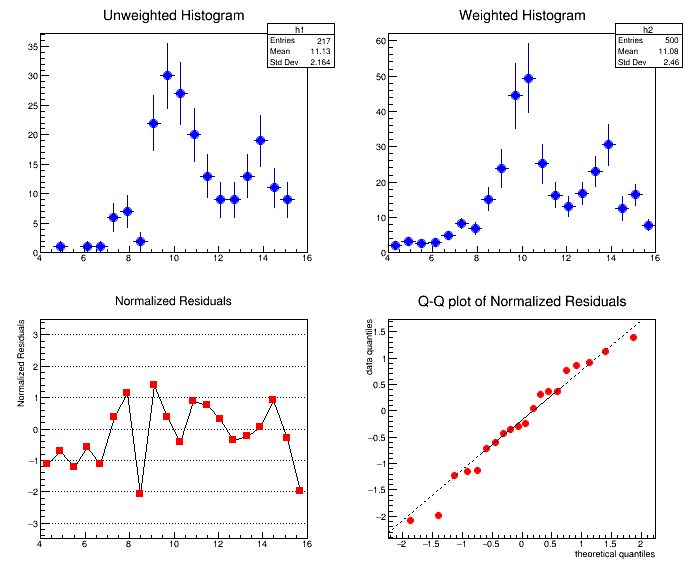

In [9]:
gROOT->GetListOfCanvases()->Draw()